In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
cf.go_offline()

### The data

In [53]:
train = pd.read_csv('data/train.csv')

## Exploratory Data Analysis

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


***891 rows in train data.Name, Sex, Ticket, Cabin and Embarked are categorical variables. Name contains a name itself and a title. Cabin and ticket consist of a letters and numbers.***

### Passenger Class

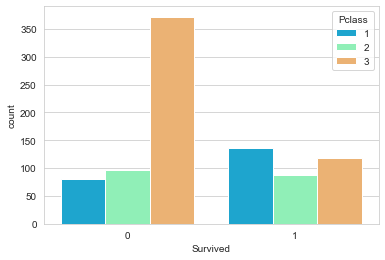

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow');

***Passengers with Pclass 3 had less chances of surviving. This is reasonable, as passengers in the first class lived at higher decks and thus could get to lifeboats faster.***

### Name

***Names by themselves are useful. One way to use them is grouping people by family names - maybe families have better chance for survival?(a Lannister could have survived and not a Stark if it was in GOT) But it is complicated, and there is a better way to create a feature for families. Another way is extracting a title from the name and using it.***

In [57]:
import re
train['Title'] = train['Name'].apply(lambda x: (re.search('([a-zA-Z]+)\.', x)).group(1))
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Don           1
Countess      1
Jonkheer      1
Sir           1
Mme           1
Capt          1
Lady          1
Name: Title, dtype: int64

***Grouping the titles by social status***

In [59]:
titles = {'Capt':       'Officer',
          'Col':        'Officer',
          'Major':      'Officer',
          'Jonkheer':   'Royalty',
          'Don':        'Royalty',
          'Sir' :       'Royalty',
          'Dr':         'Officer',
          'Rev':        'Officer',
          'Countess':   'Royalty',
          'Dona':       'Royalty',
          'Mme':        'Mrs',
          'Mlle':       'Miss',
          'Ms':         'Mrs',
          'Mr' :        'Mr',
          'Mrs' :       'Mrs',
          'Miss' :      'Miss',
          'Master' :    'Master',
          'Lady' :      'Royalty'
                    }

train['Title'] = train['Title'].map(titles)
train['Title'].value_counts()

Mr        517
Miss      184
Mrs       127
Master     40
Name: Title, dtype: int64

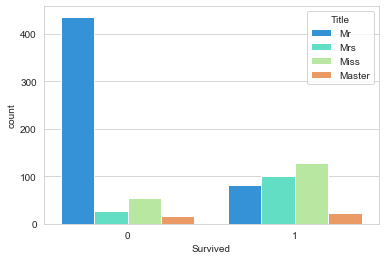

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Title',data=train,palette='rainbow');

*It seems most of men didnt survive the distater...more women survived especially  those who are not married.It makes sense as men helped them survive* **..sorry BoyChild***

### Age 

**using seaborn to create a simple heatmap to see where we are missing data as we already know we have null  values for age**

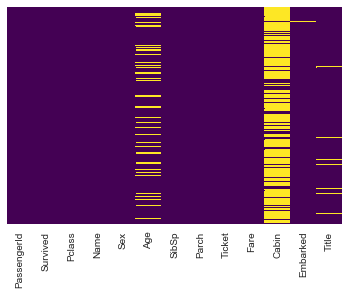

In [62]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of **imputation**. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with it at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

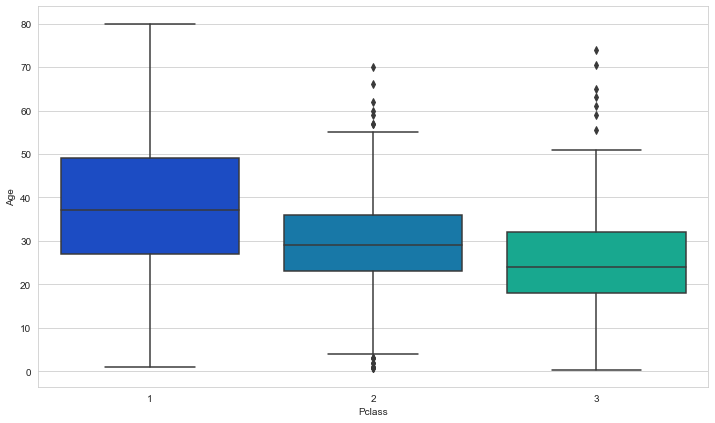

In [70]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter');

***Its evident that wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.***

In [73]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [75]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

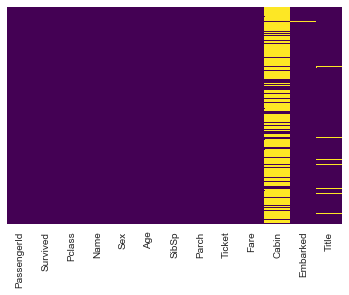

In [77]:
# checking the heatmap again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');